# 2023-02-15 Projections, rotations, and reflections


## Last time

* Algebra of linear transformations
* Polynomial evaluation and fitting

## Today

* Orthogonality
* Projections
* Rotations
* Reflections
* Oh my!

In [4]:
using LinearAlgebra
using Plots
using Polynomials
default(linewidth=4, legendfontsize=12)

function vander(x, k=nothing)
    if isnothing(k)
        k = length(x)
    end
    m = length(x)
    V = ones(m, k)
    for j in 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

vander (generic function with 2 methods)

# Matrices as linear transformations

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.  The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  The familiar definition,

$$ y_i = \sum_j A_{i,j} x_j $$

can also be viewed as

$$ y = \Bigg[ A_{:,1} \Bigg| A_{:,2} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_1 \\ x_2 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,1} \Bigg] x_1 + \Bigg[ A_{:,2} \Bigg] x_2 + \dotsb . $$

# Inner products and orthogonality

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about their magnitude and about the angle.
The **norm** is induced by the inner product,
$$ \lVert x \rVert = \sqrt{x^T x} $$
and the angle $\theta$ is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$
Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties
$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y \\
\end{split} . $$

# Examples with inner products

In [35]:
x = [0, 1]
y = [1, 2]
@show x' * y
@show y' * x;

x' * y = 2
y' * x = 2


In [40]:
ϕ = pi/6
y = [cos(ϕ), sin(ϕ)]
@show x' * y
cos_θ = x'*y / (norm(x) * norm(y))
@show cos_θ
@show cos(ϕ-pi/2);
acosd(cos_θ)

x' * y = 0.49999999999999994
cos_θ = 0.49999999999999994
cos(ϕ - pi / 2) = 0.4999999999999999


60.00000000000001

# Polynomials can be orthogonal too!


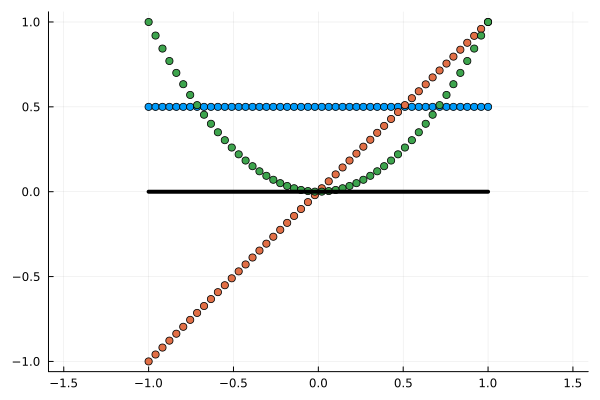

In [44]:
x = LinRange(-1, 1, 50)
A = vander(x, 4)
M = A * [.5 0 0 0; # 0.5
         0  1 0 0;  # x
         0  0 1 0]' # x^2
scatter(x, M, legend=:none)
plot!(x, 0*x, label=:none, color=:black)

* Which inner product will be zero?

  * Which functions are even and odd?

# Polynomial inner products

In [45]:
M[:,1]' * M[:,2]

-2.220446049250313e-16

In [48]:
acosd(M[:,1]' * M[:,3] / (norm(M[:,1]) * norm(M[:,3])))

41.79321606483336

In [8]:
M[:,2]' * M[:,3]

-4.440892098500626e-16

# Geometry of Linear Algebra

We'd like to develop intuition about transformations on vectors. We'll start with a peanut-shaped cluster of points and see how they transform.

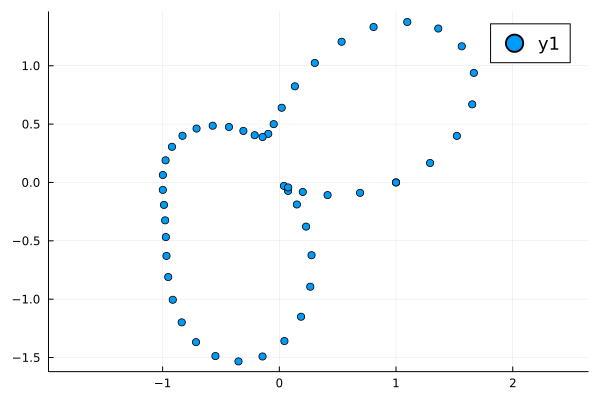

In [50]:
default(aspect_ratio=:equal)

function peanut()
    theta = LinRange(0, 2*pi, 50)
    r = 1 .+ .4*sin.(3*theta) + .6*sin.(2*theta)
    x = r .* cos.(theta)
    y = r .* sin.(theta)
    x, y
end
x, y = peanut()
scatter(x, y)

We'll group all these points into a $2\times n$ matrix $X$. Note that multiplication by any matrix $A$ is applied to each column separately, i.e.,

$$ A \underbrace{\Bigg[ \mathbf x_1 \Bigg| \mathbf x_2 \Bigg| \dotsb \Bigg]}_X = \underbrace{\Bigg[ A \mathbf x_1 \Bigg| A \mathbf x_2 \Bigg| \dotsb \Bigg]}_{AX} $$

In [51]:
X = [x y]'
size(X)

(2, 50)

# Inner products and projections

Consider the operation $f(x) = v (v^T x)$ for some vector $v$. We'll apply this same operation to every point in the original cluster $X$.

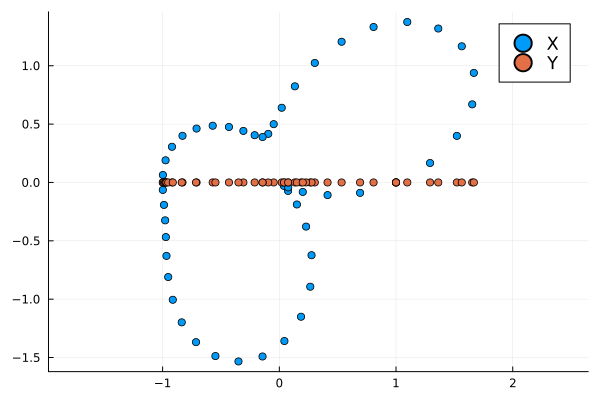

In [57]:
function tplot(X, Y)
    "Plot a transformation from X to Y"
    scatter(X[1,:], X[2,:], label="X")
    scatter!(Y[1,:], Y[2,:], label="Y")
end

v = [1, 0]
tplot(X, v * (v' * X))

Are the parentheses important? Why or why not?
$$v (v^T X) \overset?= v v^T X$$

# Questions

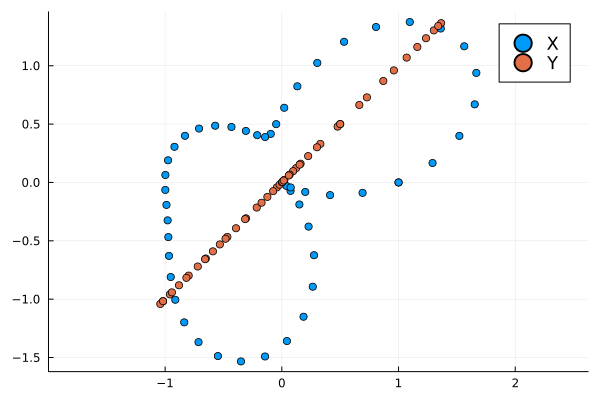

In [63]:
v = [1, 1] / sqrt(2)

# What happens if v is not normalized?
# Discuss with your group and make a prediction before uncommenting and running the line below.
tplot(X,  v * v' * X)

norm(v) = 0.9999999999999999


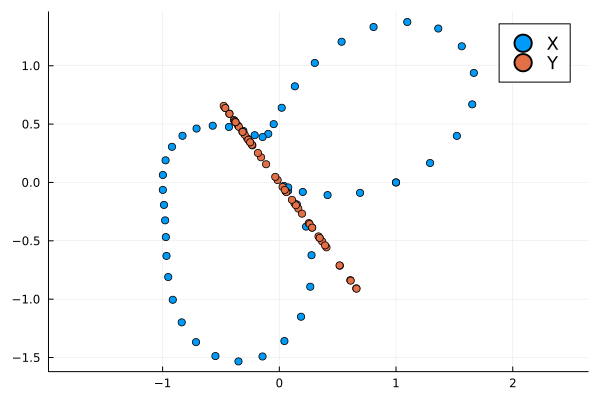

In [27]:
# Vector transformations are "nice" if norm(v) = 1

theta = pi * .7
v = [cos(theta), sin(theta)]
@show norm(v)
tplot(X, v * v' * X)

# A related projector

Compare to the operation $I - v v^T$. Note that $(I - v v^T) X = X - v v^T X$.

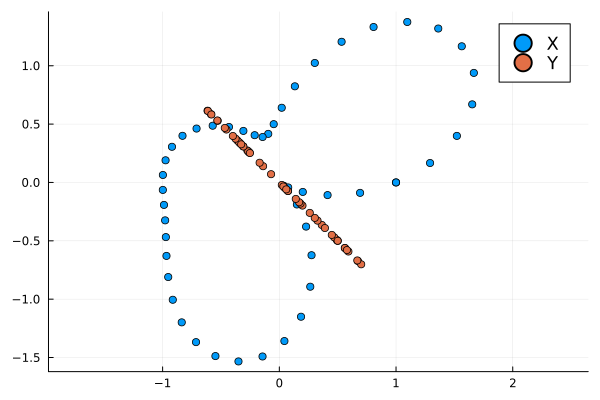

In [64]:
tplot(X, X - v * v' * X)

# This also works since I is the automatically-sized identity.
#tplot(X, (I - v * v') * X)

# Discuss

Discuss with your group what the vector $v$ looks like in these diagrams.
* What is the **null space** of each transformation?
* What is the **range** of each transformation?
* For each figure, what happens if you apply the transformation $v v^T$ to the red points?
* What about $I - v v^T$?

# Givens Rotation

We can rotate the input using a $2\times 2$ matrix, parametrized by $\theta$.

In [65]:
function givens(theta)
    s = sin(theta)
    c = cos(theta)
    A = [c -s; s c]
    A
end

givens(0)

2×2 Matrix{Float64}:
 1.0  -0.0
 0.0   1.0

In [68]:
givens(1*π)

2×2 Matrix{Float64}:
 -1.0          -1.22465e-16
  1.22465e-16  -1.0

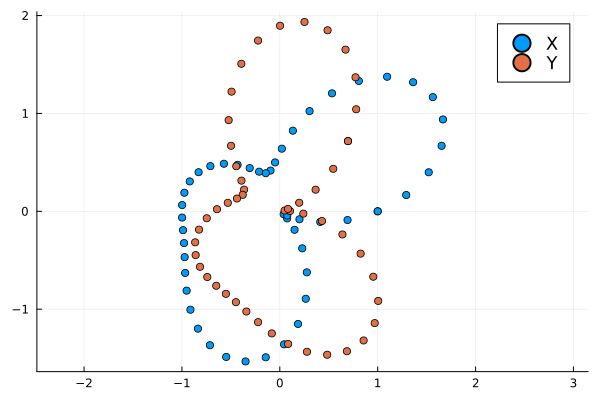

In [69]:
tplot(X, givens(.8) * X)

* What is the null space and range of the Givens matrix?
* Is the Givens matrix orthogonal? What does that mean?

# Reflection

Using a construct of the form $I - \alpha v v^T$, create a reflection across the plane defined by unit normal vector $v = [\cos\theta, \sin\theta]$. Try different values of $\alpha$ and convince yourself of why it works or sketch a diagram for the projections $v v^T$ and $I - v v^T$ and decide how to modify it to make a reflection.

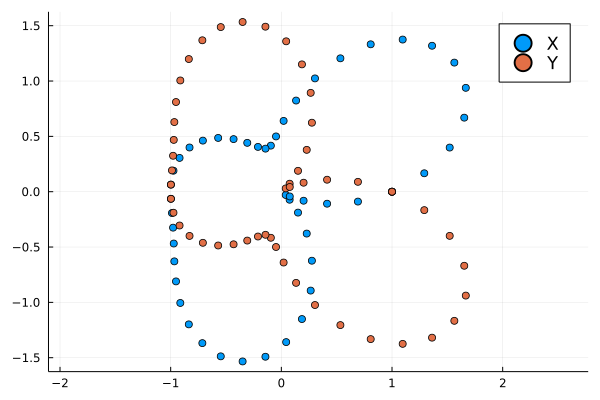

In [41]:
function reflect(theta)
    v = [cos(theta), sin(theta)]
    I - ??? * v * v'
end

tplot(X, reflect(pi/2) * X)

In [38]:
using Test
@test mapslices(norm, X; dims=1) ≈ mapslices(norm, reflect(0.3) * X; dims=1)
@test X ≈ reflect(0.5) * reflect(0.5) * X

Test Passed
  Expression: X ≈ reflect(0.5) * reflect(0.5) * X
   Evaluated: [1.0 1.291607690975099 … 0.6919723366713914 0.9999999999999993; 0.0 0.16653437041080127 … -0.08921995295821092 -2.449293598294705e-16] ≈ [1.0 1.291607690975099 … 0.6919723366713914 0.9999999999999993; 0.0 0.16653437041080127 … -0.08921995295821092 -2.449293598294705e-16]

* Where is the vector $v$ on the figure above?
* Does the reflection matrix change if you replace $ v(\theta)$ with $v(\theta + \pi)$? Why or why not?
* What happens if you reflect twice?
* What is the null space and range of the reflection matrix?
* Is the reflection matrix orthogonal?